# Importing the necessary libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import confusion_matrix #confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve #metrics
from sklearn.model_selection import cross_val_score #cross validation
from sklearn.model_selection import GridSearchCV #find best parameter 
from sklearn.ensemble import RandomForestClassifier #ML model
from sklearn.tree import DecisionTreeClassifier #ML model
from sklearn.model_selection import KFold #cross validation by kfold
from prince import PCA
from prince import MCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Importing the data and deleting brand

In [52]:
df=pd.read_csv("C:\\Users\\Acer\\Desktop\\Advanced Analysis\\Data.csv")

In [53]:
del(df["Brand"])

# Creating a dataframe of the Quantitative columns

In [54]:
numcols = df.select_dtypes(['number']).columns
df[numcols].head()

,Rate Count,ABV,Rating,Price
0,1,0.139,5.0,20.99
1,1,0.145,5.0,21.99
2,1,0.142,5.0,23.99
3,1,0.147,5.0,19.99
4,1,0.146,5.0,27.99


# Creating a dataframe of the categorical columns

In [55]:
catcols = df.select_dtypes(['object']).columns
df[catcols].head()

,Country,Suggested Glassware,Suggested Serving Temperature,Sweet-Dry Scale,Body,Type of Wine
0,France,Bordeaux Glass,60-65° F,Dry Wine,Medium,Red Wine
1,France,Bordeaux Glass,60-65° F,Dry Wine,Medium,Red Wine
2,France,Bordeaux Glass,60-65° F,Dry Wine,Full,Red Wine
3,United States,Bordeaux Glass,60-65° F,Dry Wine,Full,Red Wine
4,United States,Bordeaux Glass,60-65° F,Dry Wine,Full,Red Wine


# Seperating the target column

In [56]:
df["Price"]=[0 if i<=16.97 else 1 for i in df["Price"]]

In [57]:
Price = df['Price']
# goodbye target column
df = df.drop(['Price'],axis=1)

# Updating the categorical columns

In [58]:
# update catcols variable
catcols = df.select_dtypes(['object']).columns

# convert object columns to categorical columns
df[catcols] = df[catcols].astype('category')

# Identifying the PCA cols and MCA cols

In [59]:
pca_cols = df.select_dtypes(['number']).columns
print(len(pca_cols), 'features used for PCA are', pca_cols.tolist())

3 features used for PCA are ['Rate Count', 'ABV', 'Rating']


In [60]:
mca_cols = df.select_dtypes(['category']).columns
print(len(mca_cols), 'features used for MCA are', mca_cols.tolist())

6 features used for MCA are ['Country', 'Suggested Glassware', 'Suggested Serving Temperature', 'Sweet-Dry Scale', 'Body', 'Type of Wine']


# Doing the correspondance analysis

In [61]:
# instantiate MCA class
mca = MCA(n_components = 6)

# get principal components
mca = mca.fit(df[mca_cols])

In [62]:

cat_columns_mca = mca.transform(df[mca_cols])
cat_columns_mca.head()

,0,1,2,3,4,5
0,-0.643494,0.217742,-0.080103,0.054769,-0.126748,-0.236955
1,-0.643494,0.217742,-0.080103,0.054769,-0.126748,-0.236955
2,-0.521087,-0.168381,-0.047913,0.030340,-0.308563,-0.245342
3,-0.626337,-0.122811,-0.079561,-0.001726,-0.596639,-0.317613
4,-0.626337,-0.122811,-0.079561,-0.001726,-0.596639,-0.317613


In [63]:
cols = pd.concat([df[pca_cols], cat_columns_mca],axis=1) 

In [64]:
cols.head()

,Rate Count,ABV,Rating,0,1,2,3,4,5
0,1,0.139,5.0,-0.643494,0.217742,-0.080103,0.054769,-0.126748,-0.236955
1,1,0.145,5.0,-0.643494,0.217742,-0.080103,0.054769,-0.126748,-0.236955
2,1,0.142,5.0,-0.521087,-0.168381,-0.047913,0.030340,-0.308563,-0.245342
3,1,0.147,5.0,-0.626337,-0.122811,-0.079561,-0.001726,-0.596639,-0.317613
4,1,0.146,5.0,-0.626337,-0.122811,-0.079561,-0.001726,-0.596639,-0.317613


# Standardizing the data

In [65]:
ssc=StandardScaler()
mat_ssc=ssc.fit_transform(cols)
mat_ssc

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[-1.08696011e-01, -5.03215735e-03,  1.23524699e-01, ...,
         9.29868535e-02, -2.22825254e-01, -4.75791400e-01],
       [-1.08696011e-01,  1.48085784e-02,  1.23524699e-01, ...,
         9.29868535e-02, -2.22825254e-01, -4.75791400e-01],
       [-1.08696011e-01,  4.88821055e-03,  1.23524699e-01, ...,
         5.15115028e-02, -5.42457049e-01, -4.92632276e-01],
       ...,
       [ 4.33495407e-01, -3.81000503e-02, -1.35534256e+00, ...,
         5.15900971e-02, -2.56224846e-01, -3.36782289e-01],
       [-1.08696011e-01, -5.13272075e-02,  1.23524699e-01, ...,
         1.06032398e-01,  2.50217179e-01, -1.91665219e-01],
       [-1.08696011e-01, -6.78611540e-02,  1.23524699e-01, ...,
         8.17119735e+00, -1.80083927e+00,  2.82770522e-01]])

In [66]:
cols=pd.DataFrame(mat_ssc)
cols

,0,1,2,3,4,5,6,7,8
0,-0.108696,-0.005032,0.123525,-0.798807,0.313692,-0.131883,0.092987,-0.222825,-0.475791
1,-0.108696,0.014809,0.123525,-0.798807,0.313692,-0.131883,0.092987,-0.222825,-0.475791
2,-0.108696,0.004888,0.123525,-0.646856,-0.242580,-0.078886,0.051512,-0.542457,-0.492632
3,-0.108696,0.021422,0.123525,-0.777509,-0.176928,-0.130991,-0.002931,-1.048899,-0.637749
4,-0.108696,0.018115,0.123525,-0.777509,-0.176928,-0.130991,-0.002931,-1.048899,-0.637749
...,...,...,...,...,...,...,...,...,...
6464,-0.108696,-0.034793,0.123525,1.247112,0.450809,-0.345800,0.025131,-0.473281,-0.158188
6465,-0.108696,-0.067861,0.123525,1.674951,0.661809,-0.453845,0.059471,-0.164876,-0.195412
6466,0.433495,-0.038100,-1.355343,1.278162,0.402960,-0.291188,0.051590,-0.256225,-0.336782
6467,-0.108696,-0.051327,0.123525,1.408815,0.337308,-0.239083,0.106032,0.250217,-0.191665


# Doing the PCA

In [67]:
#Setup our PCA, n_components control the number of the dimension
pca =PCA(n_components = 2)
#Training and transform our data
pca.fit(cols)
mpg_pca = pca.transform(cols)
mpg_pca.head()

,0,1
0,-0.038506,0.533039
1,-0.039337,0.546792
2,-0.024955,0.640461
3,0.073646,0.827685
4,0.073785,0.825393


(-5.0, 15.0)

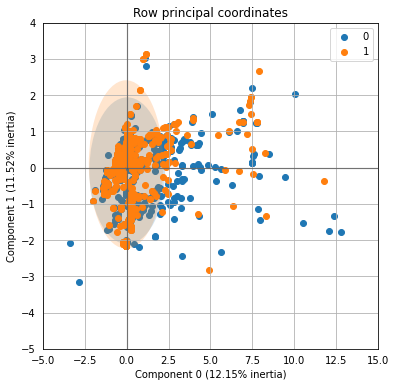

In [68]:
ax = pca.plot_row_coordinates(cols, color_labels=Price)
plt.ylim(-5,4)
plt.xlim(-5,15)

In [69]:
pca.explained_inertia_

array([0.12150137, 0.11524858])